# Proyecto: Detección de Sitios Web de Phishing usando Aprendizaje Automático

### 1. Primero, asegúrate de tener instaladas las bibliotecas necesarias.
Puede ejecuta este comando en una celda de Jupyter Notebook Google Coolab:

In [7]:
#!pip install scipy pandas scikit-learn numpy

En este caso se trabajo en un entorno virtual de python con el IDE Visual Studio Code y todas las dependencias se encuentran en archivo `requirements.txt`


## 2. Importación de Bibliotecas
A continuación, importa las bibliotecas que utilizarás en el proyecto:

- `pandas` se utiliza para manipulación de datos.
- `arff` de scipy.io se usa para cargar archivos .arff.
- `train_test_split` de sklearn.model_selection divide el conjunto de datos.
- `classification_report` evalúa el rendimiento del modelo.

In [8]:
import pandas as pd
from scipy.io import arff
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
# from mlxtend.plotting import plot_confusion_matrix
# import matplotlib.pyplot as plt


## 3. Carga del Archivo .arff
Carga los datos desde el archivo .arff y conviértelos a un DataFrame de pandas para facilitar su manipulación:

Este bloque de código carga los datos y los convierte en un DataFrame de pandas, lo que facilita su análisis y procesamiento posterior.

In [9]:
# Cargar el archivo .arff
data, meta = arff.loadarff('TrainingDataset.arff')

# Convertir a DataFrame de pandas
df = pd.DataFrame(data)

## 4. Decodificación de Columnas
Las columnas categóricas están en formato byte y deben ser convertidas a strings:

Este paso asegura que las columnas categóricas se manejen correctamente en Python.

In [10]:
# Convertir las columnas categóricas de bytes a strings
for column in df.columns:
    if df[column].dtype == object:
        df[column] = df[column].str.decode('utf-8')

## 5. Separación de Características y Etiquetas
Separa las características (X) de la etiqueta (y):

En este paso, X contiene todas las características o atributos y y contiene las etiquetas de clasificación o target.

In [11]:
# Separar características y etiquetas
X = df.drop('Result', axis=1)
y = df['Result']

## 6. División del Conjunto de Datos
Divide los datos en conjuntos de entrenamiento y prueba:

Este bloque divide los datos, reservando el 20% para pruebas y el 80% para entrenamiento.

In [12]:
# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 7. Entrenamiento del Modelo

1. KNN
2. Árbol de desición
3. Perceptrón Simple

In [13]:
# Entrenar el modelo
from sklearn.neighbors import KNeighborsClassifier
model1 = KNeighborsClassifier()
model1.fit(X_train, y_train)

from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier()
model2.fit(X_train, y_train)

from sklearn.linear_model import Perceptron
model3 = Perceptron()
model3.fit(X_train, y_train)


KNeighborsClassifier()

## 8. Predicción y Evaluación
Predice y evalúa el modelo con el conjunto de prueba:

Este código predice las etiquetas para los datos de prueba y luego imprime un reporte de clasificación que incluye métricas como precisión, recall y F1-score.

In [14]:
# Predecir y evaluar KNN
y_pred = model1.predict(X_test)
matrix1 = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.95      0.95      0.95       956
           1       0.96      0.96      0.96      1255

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



In [15]:
# Predecir y evaluar Desicion Tree
y_pred = model2.predict(X_test)
matrix2 = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.93      0.83      0.87       956
           1       0.88      0.95      0.91      1255

    accuracy                           0.90      2211
   macro avg       0.90      0.89      0.89      2211
weighted avg       0.90      0.90      0.90      2211



In [16]:
# Predecir y evaluar Perceptron
y_pred = model3.predict(X_test)
matrix3 = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.94      0.92      0.93       956
           1       0.94      0.95      0.95      1255

    accuracy                           0.94      2211
   macro avg       0.94      0.94      0.94      2211
weighted avg       0.94      0.94      0.94      2211



## Matriz de confusion

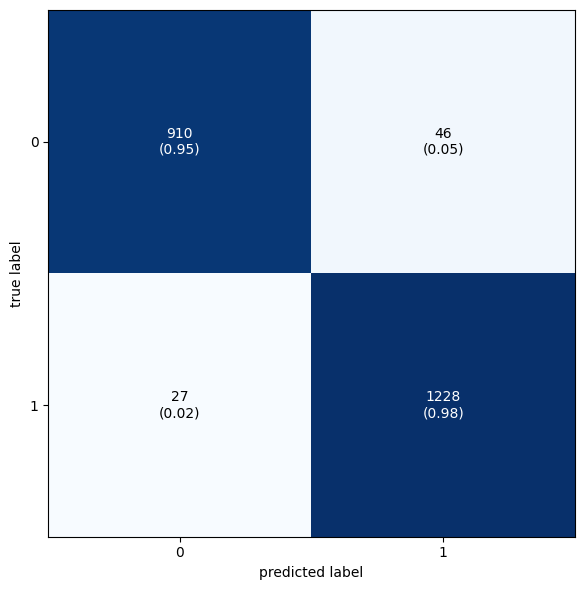

In [20]:

plot_confusion_matrix(conf_mat=matrix1, figsize=(6,6), show_normed=True)
plt.tight_layout()

## TEST

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report

# Supongamos que tienes tres informes de clasificación en formato de diccionario
report1 = {...}  # Informe de clasificación 1
report2 = {...}  # Informe de clasificación 2
report3 = {...}  # Informe de clasificación 3

# Convertir los informes de clasificación a DataFrames
df1 = pd.DataFrame(report1).transpose()
df2 = pd.DataFrame(report2).transpose()
df3 = pd.DataFrame(report3).transpose()

# Crear una figura con tres subgráficos
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Crear un gráfico de barras para cada informe de clasificación
sns.barplot(ax=axes[0], x=df1.index, y='f1-score', data=df1)
sns.barplot(ax=axes[1], x=df2.index, y='f1-score', data=df2)
sns.barplot(ax=axes[2], x=df3.index, y='f1-score', data=df3)

# Añadir títulos a los subgráficos
axes[0].set_title('Clasificador 1')
axes[1].set_title('Clasificador 2')
axes[2].set_title('Clasificador 3')

plt.show()
